In [41]:
#Part g) Fine-Tuning

import os
import tarfile
import urllib

import pandas as pd
from sklearn.metrics import mean_squared_error as mse


#reading ARP MitM dataset
PATH = "arp_mitm"

FILE = "ARP MitM_dataset-002.csv"
L_FILE = "ARP MitM_labels.csv"

#input data -> measured
csv_path = os.path.join(PATH, FILE)
dataset_filt = pd.read_csv(csv_path, header=None)  
#dataset_filt = dataset.dropna()
#display(dataset.head())
#display(dataset.info())
#display(dataset.describe())


In [42]:
#Reading output data is the observation of malicous and none malicous 
csv_path_L = os.path.join(PATH, L_FILE)
dataset_L_filt = pd.read_csv(csv_path_L, dtype={"": int, "x": 'float64'})  


display(dataset_L_filt.head())
display(dataset_L_filt.info())
display(dataset_L_filt.describe())


,Unnamed: 0,x
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   x           float64
dtypes: float64(1), int64(1)
memory usage: 38.2 MB


None

,Unnamed: 0,x
count,2.504267e+06,2.504267e+06
mean,1.252134e+06,4.573282e-01
std,7.229198e+05,4.981759e-01
min,1.000000e+00,0.000000e+00
25%,6.260675e+05,0.000000e+00
50%,1.252134e+06,0.000000e+00
75%,1.878200e+06,1.000000e+00
max,2.504267e+06,1.000000e+00


In [43]:
#counting how many malicous and non malicous was observed in the dataset
#dataset_L_filt.drop('Unnamed: 0', axis=1)
dataset_L_filt["x"].value_counts()

0.0    1358995
1.0    1145272
Name: x, dtype: int64

In [48]:
#trying to look at the coleration between feature but clearly this does not help much since we have wait too much data.
#all the feature have some kind of coleration to one another as observe. This indicate that we cant fix one input while 
#changing the other inputs. 
correlation = dataset.corr()
correlation

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.000000,0.888993,0.555361,0.985682,0.916360,0.686321,0.930925,0.916909,0.832364,0.900150,...,-0.217730,NaN,NaN,-0.127438,0.894087,-0.452721,0.894087,-0.452881,NaN,NaN
1,0.888993,1.000000,0.268052,0.874687,0.981189,0.432338,0.824010,0.893352,0.657625,0.798113,...,-0.313905,NaN,NaN,-0.102821,0.802862,-0.444215,0.802862,-0.444355,NaN,NaN
2,0.555361,0.268052,1.000000,0.640699,0.410116,0.977287,0.720824,0.625085,0.875702,0.761625,...,0.035427,NaN,NaN,-0.113905,0.750729,-0.319416,0.750729,-0.319555,NaN,NaN
3,0.985682,0.874687,0.640699,1.000000,0.924874,0.760143,0.976825,0.954672,0.891553,0.952973,...,-0.216199,NaN,NaN,-0.136540,0.944589,-0.473812,0.944589,-0.473981,NaN,NaN
4,0.916360,0.981189,0.410116,0.924874,1.000000,0.551961,0.897261,0.959641,0.748526,0.880278,...,-0.324761,NaN,NaN,-0.112048,0.885439,-0.485679,0.885439,-0.485831,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,-0.452721,-0.444215,-0.319416,-0.473812,-0.485679,-0.366071,-0.474741,-0.523971,-0.414893,-0.460251,...,0.627931,NaN,NaN,-0.226496,-0.612351,1.000000,-0.612351,1.000000,NaN,NaN
111,0.894087,0.802862,0.750729,0.944589,0.885439,0.845051,0.968204,0.966637,0.939324,0.976353,...,-0.280132,NaN,NaN,-0.086476,1.000000,-0.612351,1.000000,-0.612514,NaN,NaN
112,-0.452881,-0.444355,-0.319555,-0.473981,-0.485831,-0.366230,-0.474917,-0.524132,-0.415073,-0.460441,...,0.627859,NaN,NaN,-0.226369,-0.612514,1.000000,-0.612514,1.000000,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Part g) Fine-Tuning

import numpy as np
import matplotlib as plt
import scipy.stats

dataset = None
dataset_L = None

#extracing all rows that have values that abide by Zscore < 2 standard deviations from the mean

z_score = np.abs(stats.zscore(dataset_filt))
dataset = dataset_filt[(z_score < 2).all(axis=1)]
dataset_L = dataset_L_filt[(z_score < 2).all(axis=1)]

print("original dataset:")
display(dataset.info())
display(dataset_L.info())
print("new with IQR outlier filtering:")
display(dataset_filt.info())
display(dataset_L_filt.info())

original dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426051 entries, 147800 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 1.2 GB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426051 entries, 147800 to 2504266
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1426051 non-null  int64  
 1   x           1426051 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 32.6 MB


None

new with IQR outlier filtering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Columns: 115 entries, 0 to 114
dtypes: float64(115)
memory usage: 2.1 GB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504267 entries, 0 to 2504266
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   x           float64
dtypes: float64(1), int64(1)
memory usage: 38.2 MB


None

In [50]:
# part h) accuracy scores

#LDA classification model, the classification metric is also show in the result print out as the measurement of model accuratecy

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

#splitting the dataset for the cross validation test on unseen testing data. 
#splitting ratio is 3:1 for training and testing
x_train, x_test, y_train, y_test = train_test_split( dataset, dataset_L, test_size=0.75, random_state=4)


lda = LinearDiscriminantAnalysis(solver='svd')
lda_training = lda.fit(x_train,(y_train['x']==1)).predict(x_train)
lda_testing = lda.fit(x_test,(y_test['x']==1)).predict(x_test)


print("\nTRAINING DATA:")
print(classification_report((y_train['x']==1), lda_training, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score((y_train['x']==1), lda_training))

print("\nTEST DATA:")
print(classification_report((y_test['x']==1), lda_testing, target_names=['not malicous', 'malicous']))
print(metrics.accuracy_score((y_test['x']==1), lda_testing))


TRAINING DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    167066
    malicous       1.00      1.00      1.00    189446

    accuracy                           1.00    356512
   macro avg       1.00      1.00      1.00    356512
weighted avg       1.00      1.00      1.00    356512

0.9998204829009963

TEST DATA:
              precision    recall  f1-score   support

not malicous       1.00      1.00      1.00    502247
    malicous       1.00      1.00      1.00    567292

    accuracy                           1.00   1069539
   macro avg       1.00      1.00      1.00   1069539
weighted avg       1.00      1.00      1.00   1069539

0.9998401180321616


In [51]:
# part h) training mse and test mse

print("FOR MODEL WITH NO FEATURE SELECTION")
print("Training MSE = ", mse(lda_training,y_train['x'].values))
print("Testing MSE = ", mse(lda_testing,y_test['x'].values))

FOR MODEL WITH NO FEATURE SELECTION
Training MSE =  0.0001795170990036801
Testing MSE =  0.00015988196783847994


In [59]:
# part h) Confusion Matrices

lda.fit(x_train,y_train['x'].values.ravel())

y_tr_pred = lda.predict(x_train)
y_pred = lda.predict(x_test)

print("Number of 0's and 1's in y_train dataset:")
print(y_train['x'].value_counts())
print("\nCONFUSION MATRIX FOR TRAINING SET: \n {}".format(confusion_matrix(y_train['x'].values.ravel(), y_tr_pred)))

print("\nNumber of 0's and 1's in y_test dataset:")
print(y_test['x'].value_counts())
print("\nCONFUSION MATRIX FOR TESTING SET: \n {}".format(confusion_matrix(y_test['x'].values.ravel(), y_pred)))

Number of 0's and 1's in y_train dataset:
1.0    189446
0.0    167066
Name: x, dtype: int64

CONFUSION MATRIX FOR TRAINING SET: 
 [[167063      3]
 [    61 189385]]

Number of 0's and 1's in y_test dataset:
1.0    567292
0.0    502247
Name: x, dtype: int64

CONFUSION MATRIX FOR TESTING SET: 
 [[502241      6]
 [   157 567135]]


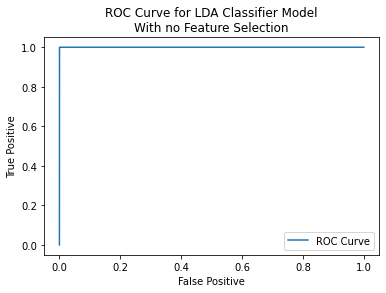

In [62]:
# Part h) ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

lda_roc = lda.predict_proba(x_test)

false_pos, true_pos, throwaway= roc_curve(y_test['x'].values.ravel(), lda_roc[:, 1])

plt.plot(false_pos, true_pos, label='ROC Curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title("ROC Curve for LDA Classifier Model\nWith no Feature Selection")
plt.legend()
plt.show()